In [270]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [293]:
# Visualize these universes and membership function

def fuzzy(heart_rate, blood_pressure, spo2_lvl, glucose_lvl, temperature, age):
    # Generate universe variables
    #   * variables have subjective ranges
    #   * each dicease has a range of [0, 100] in units of percentage points
    x_heart_rate = np.arange(0, 101, 1)
    x_blood_pressure = np.arange(0, 101, 1)
    x_spo2_level  = np.arange(0, 101, 1)
    x_glucose_level  = np.arange(0, 101, 1)
    x_temperature  = np.arange(0, 101, 1)
    x_age  = np.arange(0, 101, 1)

    x_hypoxemia = np.arange(0, 101, 1)
    x_hyperthemia  = np.arange(0, 101, 1)
    x_diabetes  = np.arange(0, 101, 1)
    x_prediabetes  = np.arange(0, 101, 1)
    x_hypoglycemia  = np.arange(0, 101, 1)
    x_stroke  = np.arange(0, 101, 1)

    # 80 - 100 pulses/min safe region, max = 130 min = 0
    heart_rate_lo = fuzz.trimf(x_heart_rate, [0, 0, 65])
    heart_rate_md = fuzz.trimf(x_heart_rate, [62, 70, 77])
    heart_rate_hi = fuzz.trimf(x_heart_rate, [75, 100, 100])

    # 80 - 120 mmHg safe region, min = 0 max = 180(220-40) for age of 40
    blood_pressure_lo = fuzz.trimf(x_blood_pressure, [0, 0, 50])
    blood_pressure_md = fuzz.trimf(x_blood_pressure, [45, 56, 67])
    blood_pressure_hi = fuzz.trimf(x_blood_pressure, [62, 100, 100])

    # 94 - 99 safe region, max = 100 min = 90
    spo2_level_lo = fuzz.trimf(x_spo2_level, [0, 0, 91])
    spo2_level_md = fuzz.trimf(x_spo2_level, [90, 93, 95])
    spo2_level_hi = fuzz.trimf(x_spo2_level, [94, 100, 100])

    # 70 - 130 mgdL safe region, max = 200
    glucose_level_lo = fuzz.trimf(x_glucose_level, [0, 0, 38])
    glucose_level_md = fuzz.trimf(x_glucose_level, [35, 49, 63])
    glucose_level_hi = fuzz.trimf(x_glucose_level, [60, 100, 100])

    # 35 - 38 centigrade safe region, max = 45 min = 15
    temperature_lo = fuzz.trimf(x_temperature, [0, 0, 47])
    temperature_md = fuzz.trimf(x_temperature, [45, 48, 51])
    temperature_hi = fuzz.trimf(x_temperature, [49, 100, 100])

    # max = 72 min = 10
    age_lo = fuzz.trimf(x_age, [0, 0, 15])
    age_md = fuzz.trimf(x_age, [7, 28, 50])
    age_hi = fuzz.trimf(x_age, [42, 100, 100])


    stroke_lo = fuzz.trimf(x_stroke, [0, 0, 40])
    stroke_md = fuzz.trimf(x_stroke, [35, 45, 55])
    stroke_hi = fuzz.trimf(x_stroke, [50, 100, 100])
    
    diabetes_lo = fuzz.trimf(x_diabetes, [0, 0, 52])
    diabetes_md = fuzz.trimf(x_diabetes, [50, 57, 65])
    diabetes_hi = fuzz.trimf(x_diabetes, [63, 100, 100])
    
    prediabetes_lo = fuzz.trimf(x_prediabetes, [0, 0, 35])
    prediabetes_md = fuzz.trimf(x_prediabetes, [40, 47, 55])
    prediabetes_hi = fuzz.trimf(x_prediabetes, [50, 100, 100])
    
    hypoglycemia_lo = fuzz.trimf(x_hypoglycemia, [0, 0, 50])
    hypoglycemia_md = fuzz.trimf(x_hypoglycemia, [45, 50, 55])
    hypoglycemia_hi = fuzz.trimf(x_hypoglycemia, [50, 100, 100])
    
    hypoxemia_lo = fuzz.trimf(x_hypoxemia, [0, 0, 50])
    hypoxemia_md = fuzz.trimf(x_hypoxemia, [45, 50, 55])
    hypoxemia_hi = fuzz.trimf(x_hypoxemia, [50, 100, 100])
    
    hyperthemia_lo = fuzz.trimf(x_hyperthemia, [0, 0, 50])
    hyperthemia_md = fuzz.trimf(x_hyperthemia, [45, 50, 55])
    hyperthemia_hi = fuzz.trimf(x_hyperthemia, [50, 100, 100])
    
    fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17) = plt.subplots(nrows=18, figsize=(10, 55))

    ax0.plot(x_heart_rate, heart_rate_lo, 'b', linewidth=1.5, label='Low')
    ax0.plot(x_heart_rate, heart_rate_md, 'g', linewidth=1.5, label='Average')
    ax0.plot(x_heart_rate, heart_rate_hi, 'r', linewidth=1.5, label='High')
    ax0.set_title('Heart Rate')
    ax0.legend()

    ax1.plot(x_blood_pressure, blood_pressure_lo, 'b', linewidth=1.5, label='Low')
    ax1.plot(x_blood_pressure, blood_pressure_md, 'g', linewidth=1.5, label='Average')
    ax1.plot(x_blood_pressure, blood_pressure_hi, 'r', linewidth=1.5, label='High')
    ax1.set_title('Blood Pressure')
    ax1.legend()

    ax2.plot(x_spo2_level, spo2_level_lo, 'b', linewidth=1.5, label='Low')
    ax2.plot(x_spo2_level, spo2_level_md, 'g', linewidth=1.5, label='Average')
    ax2.plot(x_spo2_level, spo2_level_hi, 'r', linewidth=1.5, label='High')
    ax2.set_title('SPO2 Level')
    ax2.legend()

    ax3.plot(x_glucose_level, glucose_level_lo, 'b', linewidth=1.5, label='Low')
    ax3.plot(x_glucose_level, glucose_level_md, 'g', linewidth=1.5, label='Average')
    ax3.plot(x_glucose_level, glucose_level_hi, 'r', linewidth=1.5, label='High')
    ax3.set_title('Glucose Level')
    ax3.legend()

    ax4.plot(x_temperature, temperature_lo, 'b', linewidth=1.5, label='Low')
    ax4.plot(x_temperature, temperature_md, 'g', linewidth=1.5, label='Average')
    ax4.plot(x_temperature, temperature_hi, 'r', linewidth=1.5, label='High')
    ax4.set_title('Temperature')
    ax4.legend()

    ax5.plot(x_age, age_lo, 'b', linewidth=1.5, label='Low')
    ax5.plot(x_age, age_md, 'g', linewidth=1.5, label='Average')
    ax5.plot(x_age, age_hi, 'r', linewidth=1.5, label='High')
    ax5.set_title('Age')
    ax5.legend()
    
    # We need the activation of our fuzzy membership functions at these values.
    # This is what fuzz.interp_membership exists for!
    
    heart_rate = ((heart_rate-0)/130)*100
    blood_pressure = ((blood_pressure-0)/180)*100
    spo2_lvl = ((spo2_lvl-0)/100)*100
    glucose_lvl = ((glucose_lvl-0)/200)*100
    temperature = ((temperature-15)/45)*100
    age = ((age-10)/72)*100
    
    heart_rate_lo = fuzz.interp_membership(x_heart_rate, heart_rate_lo, heart_rate)
    heart_rate_md = fuzz.interp_membership(x_heart_rate, heart_rate_md, heart_rate)
    heart_rate_hi = fuzz.interp_membership(x_heart_rate, heart_rate_hi, heart_rate)

    blood_pressure_lo = fuzz.interp_membership(x_blood_pressure, blood_pressure_lo, blood_pressure)
    blood_pressure_md = fuzz.interp_membership(x_blood_pressure, blood_pressure_md, blood_pressure)
    blood_pressure_hi = fuzz.interp_membership(x_blood_pressure, blood_pressure_hi, blood_pressure)

    spo2_level_lo = fuzz.interp_membership(x_spo2_level, spo2_level_lo, spo2_lvl)
    spo2_level_md = fuzz.interp_membership(x_spo2_level, spo2_level_md, spo2_lvl)
    spo2_level_hi = fuzz.interp_membership(x_spo2_level, spo2_level_hi, spo2_lvl)

    glucose_level_lo = fuzz.interp_membership(x_glucose_level, glucose_level_lo, glucose_lvl)
    glucose_level_md = fuzz.interp_membership(x_glucose_level, glucose_level_md, glucose_lvl)
    glucose_level_hi = fuzz.interp_membership(x_glucose_level, glucose_level_hi, glucose_lvl)

    temperature_lo = fuzz.interp_membership(x_temperature, temperature_lo, temperature)
    temperature_md = fuzz.interp_membership(x_temperature, temperature_md, temperature)
    temperature_hi = fuzz.interp_membership(x_temperature, temperature_hi, temperature)

    age_lo = fuzz.interp_membership(x_age, age_lo, age)
    age_md = fuzz.interp_membership(x_age, age_md, age)
    age_hi = fuzz.interp_membership(x_age, age_hi, age)
    
    # Now we take our rules and apply them.
    # The OR operator means we take the maximum of two.
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`

    ### Rules for stroke diagnosis
    stroke_lo_rule1 = np.fmin(heart_rate_md, age_md)
    stroke_lo_rule2 = np.fmin(heart_rate_md, age_hi)
    stroke_lo_rule3 = np.fmin(blood_pressure_md, age_md)
    stroke_lo_rule4 = np.fmin(blood_pressure_md, age_hi)
    stroke_lo_rule5 = np.fmax(stroke_lo_rule1, stroke_lo_rule2)
    stroke_lo_rule6 = np.fmax(stroke_lo_rule3, stroke_lo_rule4)
    stroke_lo_rule7 = np.fmax(stroke_lo_rule5, stroke_lo_rule6)
    stroke_activation_lo = np.fmin(stroke_lo_rule3, stroke_lo)

    stroke_md_rule1 = np.fmin(heart_rate_lo, age_md)
    stroke_md_rule2 = np.fmin(heart_rate_lo, age_hi)
    stroke_md_rule3 = np.fmin(blood_pressure_hi, age_md)
    stroke_md_rule4 = np.fmin(blood_pressure_lo, age_md)
    stroke_md_rule6 = np.fmax(stroke_md_rule1, stroke_md_rule2)
    stroke_md_rule7 = np.fmax(stroke_md_rule3, stroke_md_rule4)
    stroke_md_rule8 = np.fmax(stroke_md_rule6, stroke_md_rule7)
    stroke_activation_md = np.fmin(stroke_md_rule8, stroke_md)

    stroke_hi_rule1 = np.fmin(heart_rate_hi, age_hi)
    stroke_hi_rule2 = np.fmin(heart_rate_hi, age_hi)
    stroke_hi_rule3 = np.fmin(blood_pressure_lo, age_hi)
    stroke_hi_rule4 = np.fmin(blood_pressure_hi, age_hi)
    stroke_hi_rule5 = np.fmax(stroke_hi_rule1, stroke_hi_rule2)
    stroke_hi_rule6 = np.fmax(stroke_hi_rule3, stroke_hi_rule4)
    stroke_hi_rule7 = np.fmax(stroke_hi_rule5, stroke_hi_rule6)
    stroke_activation_hi = np.fmin(stroke_hi_rule7, stroke_hi)
    stroke0 = np.zeros_like(x_stroke)
    
    # Aggregate all three output membership functions together
    aggregated_stroke = np.fmax(stroke_activation_lo,
                         np.fmax(stroke_activation_md, stroke_activation_hi))

    # Calculate defuzzified result
    stroke = fuzz.defuzz(x_stroke, aggregated_stroke, 'centroid')
    stroke_activation = fuzz.interp_membership(x_stroke, aggregated_stroke, stroke)  # for plot

    # Visualize this
    ax6.fill_between(x_stroke, stroke0, stroke_activation_lo, facecolor='b', alpha=0.7)
    ax6.plot(x_stroke, stroke_lo, 'b', linewidth=0.5, linestyle='--', )
    ax6.fill_between(x_stroke, stroke0, stroke_activation_md, facecolor='g', alpha=0.7)
    ax6.plot(x_stroke, stroke_md, 'g', linewidth=0.5, linestyle='--')
    ax6.fill_between(x_stroke, stroke0, stroke_activation_hi, facecolor='r', alpha=0.7)
    ax6.plot(x_stroke, stroke_hi, 'r', linewidth=0.5, linestyle='--')
    ax6.set_title('Output membership - Stroke')
    
    ax7.plot(x_stroke, stroke_lo, 'b', linewidth=0.5, linestyle='--', )
    ax7.plot(x_stroke, stroke_md, 'g', linewidth=0.5, linestyle='--')
    ax7.plot(x_stroke, stroke_hi, 'r', linewidth=0.5, linestyle='--')
    ax7.fill_between(x_stroke, stroke0, aggregated_stroke, facecolor='Orange', alpha=0.7)
    ax7.plot([stroke, stroke], [0, stroke_activation], 'k', linewidth=1.5, alpha=0.9)
    ax7.set_title('Aggregated membership - Stroke')
    
##-----------------------------------------------------------------------------------------------------------------
    
    ### Rules for diabetes diagnosis
    diabetes_activation_lo = np.fmin(glucose_level_lo, diabetes_lo)
    diabetes_activation_md = np.fmin(glucose_level_md, diabetes_md)
    diabetes_activation_hi = np.fmin(glucose_level_hi, diabetes_hi)
    diabetes0 = np.zeros_like(x_diabetes)
    
    # Aggregate all three output membership functions together
    aggregated_diabetes = np.fmax(diabetes_activation_lo,
                         np.fmax(diabetes_activation_md, diabetes_activation_hi))

    # Calculate defuzzified result
    diabetes = fuzz.defuzz(x_stroke, aggregated_diabetes, 'centroid')
    diabetes_activation = fuzz.interp_membership(x_diabetes, aggregated_diabetes, diabetes)
    
    # Visualize this
    ax8.fill_between(x_diabetes, diabetes0, diabetes_activation_lo, facecolor='b', alpha=0.7)
    ax8.plot(x_diabetes, diabetes_lo, 'b', linewidth=0.5, linestyle='--', )
    ax8.fill_between(x_diabetes, diabetes0, diabetes_activation_md, facecolor='g', alpha=0.7)
    ax8.plot(x_diabetes, diabetes_md, 'g', linewidth=0.5, linestyle='--')
    ax8.fill_between(x_diabetes, diabetes0, diabetes_activation_hi, facecolor='r', alpha=0.7)
    ax8.plot(x_diabetes, diabetes_hi, 'r', linewidth=0.5, linestyle='--')
    ax8.set_title('Output membership - Diabetes')

    ax9.plot(x_diabetes, diabetes_lo, 'b', linewidth=0.5, linestyle='--', )
    ax9.plot(x_diabetes, diabetes_md, 'g', linewidth=0.5, linestyle='--')
    ax9.plot(x_diabetes, diabetes_hi, 'r', linewidth=0.5, linestyle='--')
    ax9.fill_between(x_diabetes, diabetes0, aggregated_diabetes, facecolor='Orange', alpha=0.7)
    ax9.plot([diabetes, diabetes], [0, diabetes_activation], 'k', linewidth=1.5, alpha=0.9)
    ax9.set_title('Aggregated membership - Diabetes')
    
##-----------------------------------------------------------------------------------------------------------------
    
    ### Rules for pre-diabetes diagnosis
    prediabetes_activation_lo = np.fmin(glucose_level_lo, prediabetes_lo)
    prediabetes_activation_md = np.fmin(glucose_level_lo, prediabetes_md)
    prediabtes_hi_rule1 = np.fmax(glucose_level_md, glucose_level_hi)
    prediabetes_activation_hi = np.fmin(prediabtes_hi_rule1, prediabetes_hi)
    prediabetes0 = np.zeros_like(x_prediabetes)
    
    # Aggregate all three output membership functions together
    aggregated_prediabetes = np.fmax(prediabetes_activation_lo,
                         np.fmax(prediabetes_activation_md, prediabetes_activation_hi))

    # Calculate defuzzified result
    prediabetes = fuzz.defuzz(x_prediabetes, aggregated_prediabetes, 'centroid')
    prediabetes_activation = fuzz.interp_membership(x_prediabetes, aggregated_prediabetes, prediabetes)
    
    # Visualize this
    ax10.fill_between(x_prediabetes, prediabetes0, prediabetes_activation_lo, facecolor='b', alpha=0.7)
    ax10.plot(x_prediabetes, prediabetes_lo, 'b', linewidth=0.5, linestyle='--', )
    ax10.fill_between(x_prediabetes, prediabetes0, prediabetes_activation_md, facecolor='g', alpha=0.7)
    ax10.plot(x_prediabetes, prediabetes_md, 'g', linewidth=0.5, linestyle='--')
    ax10.fill_between(x_prediabetes, prediabetes0, prediabetes_activation_hi, facecolor='r', alpha=0.7)
    ax10.plot(x_prediabetes, prediabetes_hi, 'r', linewidth=0.5, linestyle='--')
    ax10.set_title('Output membership - Prediabetes')

    ax11.plot(x_prediabetes, prediabetes_lo, 'b', linewidth=0.5, linestyle='--', )
    ax11.plot(x_prediabetes, prediabetes_md, 'g', linewidth=0.5, linestyle='--')
    ax11.plot(x_prediabetes, prediabetes_hi, 'r', linewidth=0.5, linestyle='--')
    ax11.fill_between(x_prediabetes, prediabetes0, aggregated_prediabetes, facecolor='Orange', alpha=0.7)
    ax11.plot([prediabetes, prediabetes], [0, prediabetes_activation], 'k', linewidth=1.5, alpha=0.9)
    ax11.set_title('Aggregated membership - Prediabetes')
    
##-----------------------------------------------------------------------------------------------------------------
    
    ### Rules for hypo-glycemia diagnosis
    hypoglycemia_activation_lo = np.fmin(glucose_level_hi, hypoglycemia_lo)
    hypoglycemia_activation_md = np.fmin(glucose_level_md, hypoglycemia_md)
    hypoglycemia_activation_hi = np.fmin(glucose_level_lo, hypoglycemia_hi)
    hypoglycemia0 = np.zeros_like(x_hypoglycemia)
    
    # Aggregate all three output membership functions together
    aggregated_hypoglycemia = np.fmax(hypoglycemia_activation_lo,
                         np.fmax(hypoglycemia_activation_md, hypoglycemia_activation_hi))

    # Calculate defuzzified result
    hypoglycemia = fuzz.defuzz(x_hypoglycemia, aggregated_hypoglycemia, 'centroid')
    hypoglycemia_activation = fuzz.interp_membership(x_hypoglycemia, aggregated_hypoglycemia, hypoglycemia)
    
    # Visualize this
    ax12.fill_between(x_hypoglycemia, hypoglycemia0, hypoglycemia_activation_lo, facecolor='b', alpha=0.7)
    ax12.plot(x_hypoglycemia, hypoglycemia_lo, 'b', linewidth=0.5, linestyle='--', )
    ax12.fill_between(x_hypoglycemia, hypoglycemia0, hypoglycemia_activation_md, facecolor='g', alpha=0.7)
    ax12.plot(x_hypoglycemia, hypoglycemia_md, 'g', linewidth=0.5, linestyle='--')
    ax12.fill_between(x_hypoglycemia, hypoglycemia0, hypoglycemia_activation_hi, facecolor='r', alpha=0.7)
    ax12.plot(x_hypoglycemia, hypoglycemia_hi, 'r', linewidth=0.5, linestyle='--')
    ax12.set_title('Output membership - Hypoglycemia')

    ax13.plot(x_hypoglycemia, hypoglycemia_lo, 'b', linewidth=0.5, linestyle='--', )
    ax13.plot(x_hypoglycemia, hypoglycemia_md, 'g', linewidth=0.5, linestyle='--')
    ax13.plot(x_hypoglycemia, hypoglycemia_hi, 'r', linewidth=0.5, linestyle='--')
    ax13.fill_between(x_hypoglycemia, hypoglycemia0, aggregated_hypoglycemia, facecolor='Orange', alpha=0.7)
    ax13.plot([hypoglycemia, hypoglycemia], [0, hypoglycemia_activation], 'k', linewidth=1.5, alpha=0.9)
    ax13.set_title('Aggregated membership - Hypoglycemia')
    
##-----------------------------------------------------------------------------------------------------------------
    
    ### Rules for hypo-oxemia diagnosis
    hypoxemia_activation_lo = np.fmin(spo2_level_hi, hypoxemia_lo)
    hypoxemia_activation_md = np.fmin(spo2_level_md, hypoxemia_md)
    hypoxemia_activation_hi = np.fmin(spo2_level_lo, hypoxemia_hi)
    hypoxemia0 = np.zeros_like(x_hypoxemia)
    
    # Aggregate all three output membership functions together
    aggregated_hypoxemia = np.fmax(hypoxemia_activation_lo,
                         np.fmax(hypoxemia_activation_md, hypoxemia_activation_hi))

    # Calculate defuzzified result
    hypoxemia = fuzz.defuzz(x_hypoxemia, aggregated_hypoxemia, 'centroid')
    hypoxemia_activation = fuzz.interp_membership(x_hypoxemia, aggregated_hypoxemia, hypoxemia)
    
    # Visualize this
    ax14.fill_between(x_hypoxemia, hypoxemia0, hypoxemia_activation_lo, facecolor='b', alpha=0.7)
    ax14.plot(x_hypoxemia, hypoxemia_lo, 'b', linewidth=0.5, linestyle='--', )
    ax14.fill_between(x_hypoxemia, hypoxemia0, hypoxemia_activation_md, facecolor='g', alpha=0.7)
    ax14.plot(x_hypoxemia, hypoxemia_md, 'g', linewidth=0.5, linestyle='--')
    ax14.fill_between(x_hypoxemia, hypoxemia0, hypoxemia_activation_hi, facecolor='r', alpha=0.7)
    ax14.plot(x_hypoxemia, hypoxemia_hi, 'r', linewidth=0.5, linestyle='--')
    ax14.set_title('Output membership - Hypoxemia')

    ax15.plot(x_hypoxemia, hypoxemia_lo, 'b', linewidth=0.5, linestyle='--', )
    ax15.plot(x_hypoxemia, hypoxemia_md, 'g', linewidth=0.5, linestyle='--')
    ax15.plot(x_hypoxemia, hypoxemia_hi, 'r', linewidth=0.5, linestyle='--')
    ax15.fill_between(x_hypoxemia, hypoxemia0, aggregated_hypoxemia, facecolor='Orange', alpha=0.7)
    ax15.plot([hypoxemia, hypoxemia], [0, hypoxemia_activation], 'k', linewidth=1.5, alpha=0.9)
    ax15.set_title('Aggregated membership - Hypoxemia')
    
##-----------------------------------------------------------------------------------------------------------------
    
    ### Rules for hyperthemia diagnosis
    hyperthemia_activation_lo = np.fmin(temperature_lo, hyperthemia_lo)
    hyperthemia_activation_md = np.fmin(temperature_md, hyperthemia_md)
    hyperthemia_activation_hi = np.fmin(temperature_hi, hyperthemia_hi)
    hyperthemia0 = np.zeros_like(x_hyperthemia)
    
    # Aggregate all three output membership functions together
    aggregated_hyperthemia = np.fmax(hyperthemia_activation_lo,
                         np.fmax(hyperthemia_activation_md, hyperthemia_activation_hi))

    # Calculate defuzzified result
    hyperthemia = fuzz.defuzz(x_hyperthemia, aggregated_hyperthemia, 'centroid')
    hyperthemia_activation = fuzz.interp_membership(x_hyperthemia, aggregated_hyperthemia, hyperthemia)
    
    # Visualize this
    ax16.fill_between(x_hyperthemia, hyperthemia0, hyperthemia_activation_lo, facecolor='b', alpha=0.7)
    ax16.plot(x_hyperthemia, hyperthemia_lo, 'b', linewidth=0.5, linestyle='--', )
    ax16.fill_between(x_hyperthemia, hyperthemia0, hyperthemia_activation_md, facecolor='g', alpha=0.7)
    ax16.plot(x_hyperthemia, hyperthemia_md, 'g', linewidth=0.5, linestyle='--')
    ax16.fill_between(x_hyperthemia, hyperthemia0, hyperthemia_activation_hi, facecolor='r', alpha=0.7)
    ax16.plot(x_hyperthemia, hyperthemia_hi, 'r', linewidth=0.5, linestyle='--')
    ax16.set_title('Output membership - Hyperthemia')

    ax17.plot(x_hyperthemia, hyperthemia_lo, 'b', linewidth=0.5, linestyle='--', )
    ax17.plot(x_hyperthemia, hyperthemia_md, 'g', linewidth=0.5, linestyle='--')
    ax17.plot(x_hyperthemia, hyperthemia_hi, 'r', linewidth=0.5, linestyle='--')
    ax17.fill_between(x_hyperthemia, hyperthemia0, aggregated_hyperthemia, facecolor='Orange', alpha=0.7)
    ax17.plot([hyperthemia, hyperthemia], [0, hyperthemia_activation], 'k', linewidth=1.5, alpha=0.9)
    ax17.set_title('Aggregated membership - Hyperthemia')
    
    # Turn off top/right axes
    for ax in (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    
    
    print("Stroke: ",stroke)
    print("Diabetes: ",diabetes)
    print("Prediabetes: ",prediabetes)
    print("Hpoglycemia: ",hypoglycemia)
    print("Hypoxemia: ",hypoxemia)
    print("Hyperthemia: ",hyperthemia)

Stroke:  16.506066214271026
Diabetes:  24.16037028980254
Prediabetes:  25.588567956627415
Hpoglycemia:  76.76737377302021
Hypoxemia:  81.0964138998158
Hyperthemia:  47.9553075696773


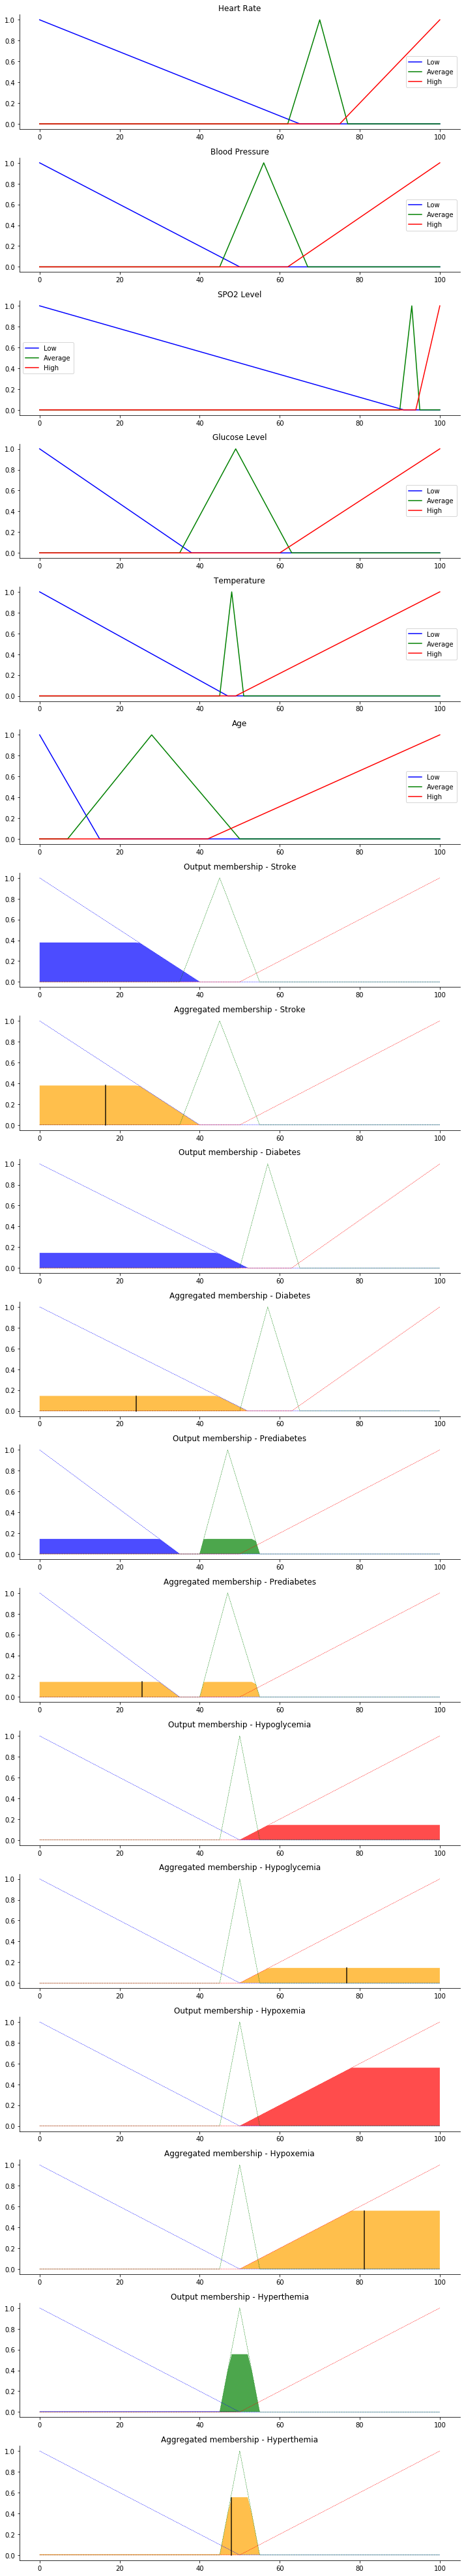

In [295]:
## Execute all functions
fuzzy(heart_rate=85, blood_pressure=90, spo2_lvl=40, glucose_lvl=65, temperature=36, age=40)